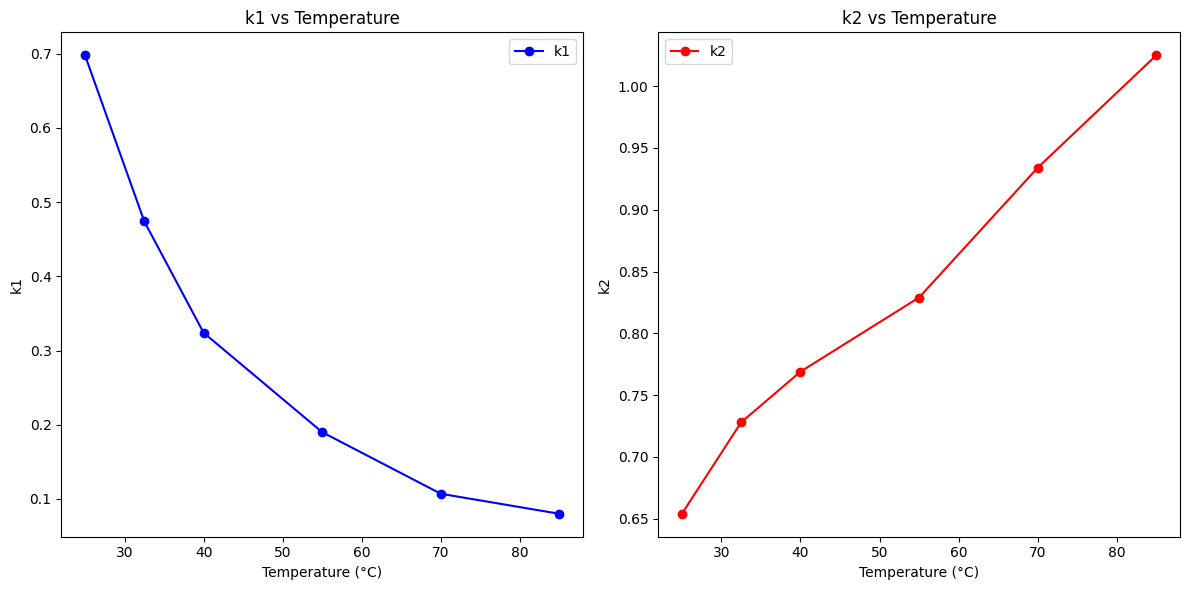

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 

temperatures = [25, 32.5, 40, 55, 70, 85]
parametres = {
    25: (0.142, 0.698, 0.654),
    32.5: (0.142, 0.474, 0.728),
    40: (0.142, 0.324, 0.769),
    55: (0.142, 0.190, 0.829),
    70: (0.142, 0.107, 0.934),
    85: (0.142, 0.080, 1.025),
}

temps = np.array(temperatures)
k1_values = np.array([parametres[temp][1] for temp in temperatures])
k2_values = np.array([parametres[temp][2] for temp in temperatures])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(temps, k1_values, 'bo-', label='k1')
plt.xlabel('Temperature (°C)')
plt.ylabel('k1')
plt.title('k1 vs Temperature')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(temps, k2_values, 'ro-', label='k2')
plt.xlabel('Temperature (°C)')
plt.ylabel('k2')
plt.title('k2 vs Temperature')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\ghanmi\AppData\Local\Temp\ipykernel_2588\222111538.py:24: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(lambda T, a, b, c: a + b * T + c * T**2, temperatures, parameters[:, i])


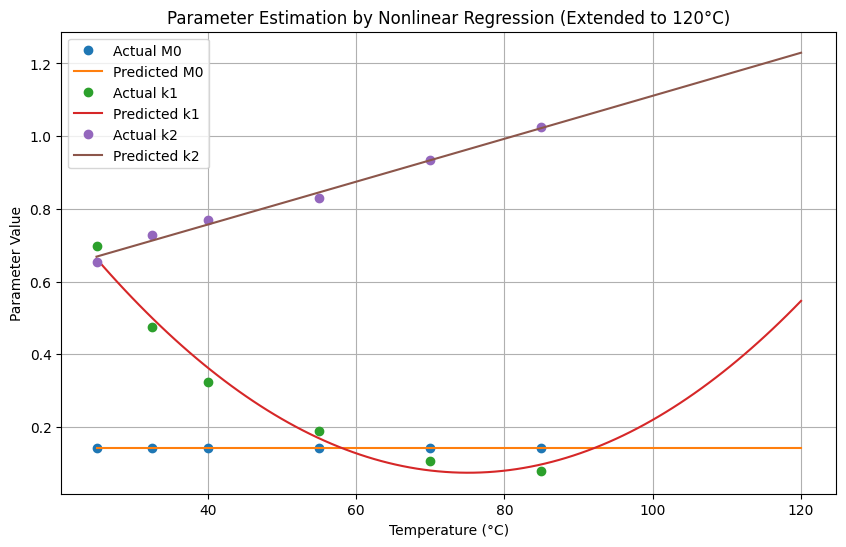

Estimated parameter values for temperature 100°C: [0.14200000043789218, 0.21964016486693927, 1.1108846125726486]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Function definition for Peleg's model
def M(t, M0, k1, k2):
    return M0 + t / (k1 + k2 * t)

# Known parameter values for different temperatures
temperatures = np.array([25, 32.5, 40, 55, 70, 85])
parameters = np.array([
    (0.142, 0.698, 0.654),
    (0.142, 0.474, 0.728),
    (0.142, 0.324, 0.769),
    (0.142, 0.190, 0.829),
    (0.142, 0.107, 0.934),
    (0.142, 0.080, 1.025),
])

# Perform nonlinear regression for each parameter
def fit_parameters(temperatures, parameters):
    interpolated_parameters = {}
    for i in range(parameters.shape[1]):
        popt, _ = curve_fit(lambda T, a, b, c: a + b * T + c * T**2, temperatures, parameters[:, i])
        interpolated_parameters[i] = popt
    return interpolated_parameters

# Fit the parameters
interpolated_parameters = fit_parameters(temperatures, parameters)

# Function to estimate parameters at a given temperature
def estimate_parameters(temperature, interpolated_parameters):
    estimated_params = []
    for i in range(len(interpolated_parameters)):
        a, b, c = interpolated_parameters[i]
        estimated_params.append(a + b * temperature + c * temperature**2)
    return estimated_params

# Predict parameters for temperatures up to 120°C
extended_temperatures = np.linspace(25, 120, 100)
predicted_params = np.array([estimate_parameters(T, interpolated_parameters) for T in extended_temperatures])

# Plotting the extended range
plt.figure(figsize=(10, 6))

for i, param_name in enumerate(['M0', 'k1', 'k2']):
    plt.plot(temperatures, parameters[:, i], 'o', label=f'Actual {param_name}')
    plt.plot(extended_temperatures, predicted_params[:, i], label=f'Predicted {param_name}')

plt.title('Parameter Estimation by Nonlinear Regression (Extended to 120°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Parameter Value')
plt.legend()
plt.grid(True)
plt.show()

# Example usage: Estimate parameters for a specific temperature (e.g., 100°C)
temperature_to_estimate = 100
estimated_params_100 = estimate_parameters(temperature_to_estimate, interpolated_parameters)
print(f"Estimated parameter values for temperature {temperature_to_estimate}°C:", estimated_params_100)


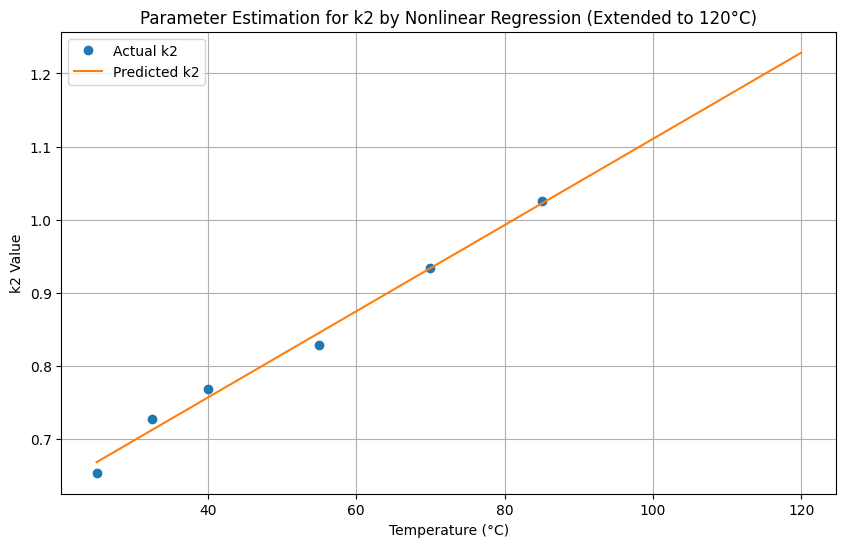

Estimated k2 value for temperature 100°C: 1.1104666664488123


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Function definition for Peleg's model
def M(t, M0, k1, k2):
    return M0 + t / (k1 + k2 * t)

# Known parameter values for different temperatures
temperatures = np.array([25, 32.5, 40, 55, 70, 85])
parameters_k2 = np.array([0.654, 0.728, 0.769, 0.829, 0.934, 1.025])

# Perform nonlinear regression for parameter k2
def fit_k2(temperatures, parameters_k2):
    popt_k2, _ = curve_fit(lambda T, c, d: c + d * T, temperatures, parameters_k2)
    return popt_k2

# Fit k2 parameter
interpolated_k2 = fit_k2(temperatures, parameters_k2)

# Function to estimate k2 at a given temperature
def estimate_k2(temperature, interpolated_k2):
    c, d = interpolated_k2
    return c + d * temperature

# Predict k2 for temperatures up to 120°C
extended_temperatures = np.linspace(25, 120, 100)
predicted_k2 = [estimate_k2(T, interpolated_k2) for T in extended_temperatures]

# Plotting the extended range
plt.figure(figsize=(10, 6))

plt.plot(temperatures, parameters_k2, 'o', label='Actual k2')
plt.plot(extended_temperatures, predicted_k2, label='Predicted k2')

plt.title('Parameter Estimation for k2 by Nonlinear Regression (Extended to 120°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('k2 Value')
plt.legend()
plt.grid(True)
plt.show()

# Example usage: Estimate k2 for a specific temperature (e.g., 100°C)
temperature_to_estimate = 100
estimated_k2_100 = estimate_k2(temperature_to_estimate, interpolated_k2)
print(f"Estimated k2 value for temperature {temperature_to_estimate}°C:", estimated_k2_100)


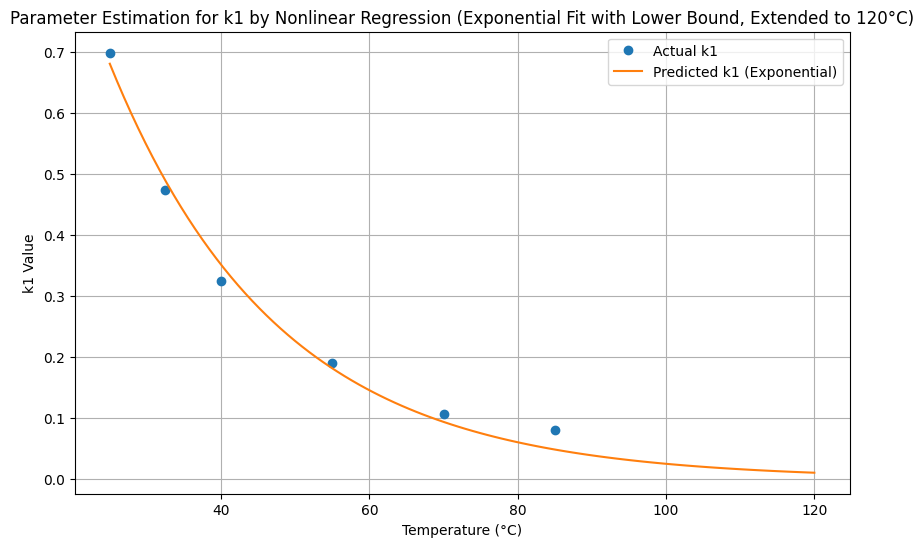

Estimated k1 value for temperature 100°C (Exponential Fit with Lower Bound): 0.024942976830246485


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Function definition for Peleg's model
def M(t, M0, k1, k2):
    return M0 + t / (k1 + k2 * t)

# Known parameter values for different temperatures
temperatures = np.array([25, 32.5, 40, 55, 70, 85])
parameters_k1 = np.array([0.698, 0.474, 0.324, 0.190, 0.107, 0.080])

# Perform nonlinear regression for parameter k1 with an exponential function and a lower bound constraint
def fit_k1_exponential(temperatures, parameters_k1):
    def exponential_func(T, a, b):
        return a * np.exp(b * T)
    
    popt_k1, _ = curve_fit(exponential_func, temperatures, parameters_k1, bounds=([0, -np.inf], [np.inf, np.inf]))
    return popt_k1

# Fit k1 parameter with exponential function and a lower bound constraint
interpolated_k1_exponential = fit_k1_exponential(temperatures, parameters_k1)

# Function to estimate k1 at a given temperature using exponential fit
def estimate_k1_exponential(temperature, interpolated_k1_exponential):
    a, b = interpolated_k1_exponential
    return max(a * np.exp(b * temperature), 0.01)  # Ensuring k1 remains positive with a minimum value of 0.01

# Predict k1 for temperatures up to 120°C using exponential fit
extended_temperatures = np.linspace(25, 120, 100)
predicted_k1_exponential = [estimate_k1_exponential(T, interpolated_k1_exponential) for T in extended_temperatures]

# Plotting the extended range
plt.figure(figsize=(10, 6))

plt.plot(temperatures, parameters_k1, 'o', label='Actual k1')
plt.plot(extended_temperatures, predicted_k1_exponential, label='Predicted k1 (Exponential)')

plt.title('Parameter Estimation for k1 by Nonlinear Regression (Exponential Fit with Lower Bound, Extended to 120°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('k1 Value')
plt.legend()
plt.grid(True)
plt.show()

# Example usage: Estimate k1 for a specific temperature (e.g., 100°C)
temperature_to_estimate = 100
estimated_k1_100_exponential = estimate_k1_exponential(temperature_to_estimate, interpolated_k1_exponential)
print(f"Estimated k1 value for temperature {temperature_to_estimate}°C (Exponential Fit with Lower Bound):", estimated_k1_100_exponential)


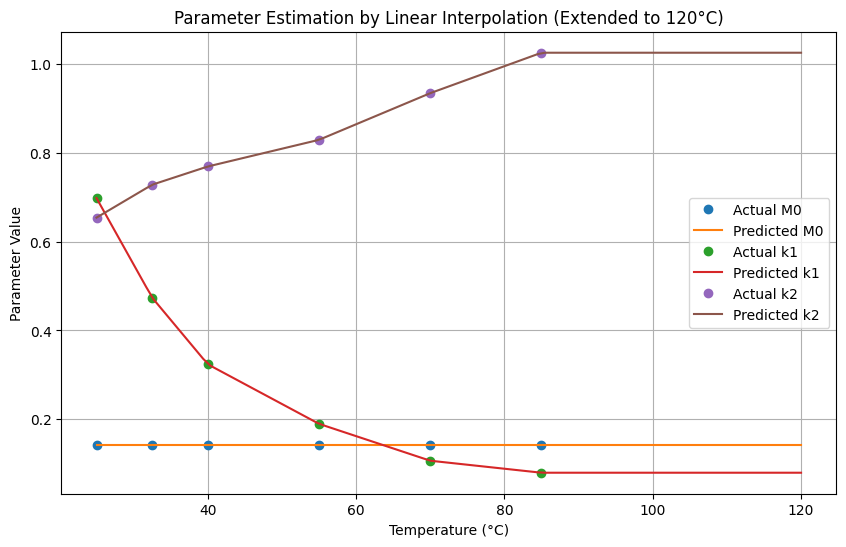

Estimated parameter values for temperature 120°C: [0.142, 0.08, 1.025]


In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Function definition for Peleg's model
def M(t, M0, k1, k2):
    return M0 + t / (k1 + k2 * t)

# Known parameter values for different temperatures
temperatures = np.array([25, 32.5, 40, 55, 70, 85])
parameters = np.array([
    (0.142, 0.698, 0.654),
    (0.142, 0.474, 0.728),
    (0.142, 0.324, 0.769),
    (0.142, 0.190, 0.829),
    (0.142, 0.107, 0.934),
    (0.142, 0.080, 1.025),
])

# Function to estimate parameters at a given temperature using linear interpolation
def estimate_parameters(temperature, temperatures, parameters):
    estimated_params = []
    for i in range(parameters.shape[1]):
        estimated_params.append(np.interp(temperature, temperatures, parameters[:, i]))
    return estimated_params

# Predict parameters for temperatures up to 120°C using linear interpolation
extended_temperatures = np.linspace(25, 120, 100)
predicted_params = np.array([estimate_parameters(T, temperatures, parameters) for T in extended_temperatures])

# Plotting the extended range
plt.figure(figsize=(10, 6))

for i, param_name in enumerate(['M0', 'k1', 'k2']):
    plt.plot(temperatures, parameters[:, i], 'o', label=f'Actual {param_name}')
    plt.plot(extended_temperatures, predicted_params[:, i], label=f'Predicted {param_name}')

plt.title('Parameter Estimation by Linear Interpolation (Extended to 120°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Parameter Value')
plt.legend()
plt.grid(True)
plt.show()

# Example usage: Estimate parameters for a specific temperature (e.g., 100°C)
temperature_to_estimate = 120
estimated_params_100 = estimate_parameters(temperature_to_estimate, temperatures, parameters)
print(f"Estimated parameter values for temperature {temperature_to_estimate}°C:", estimated_params_100)
